In [1]:
import pandas as pd

## Levanto los datos

In [2]:
df = pd.read_csv('datasets/german_credit.csv')
df

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,3,2,3,...,4,1,21,3,1,1,2,2,1,1
996,0,1,24,2,0,2303,1,5,4,3,...,1,1,45,3,2,1,3,1,1,1
997,0,4,21,4,0,12680,5,5,4,3,...,4,4,30,3,3,1,4,1,2,1
998,0,2,12,2,3,6468,5,1,2,3,...,1,4,52,3,2,1,4,1,2,1


## Variables a discretizar

- Duration of Credit (month): positive integer
- Credit Amount: positive integer
- Age (years): positive integer

### Duration of Credit

array([[<AxesSubplot:title={'center':'Duration of Credit (month)'}>]],
      dtype=object)

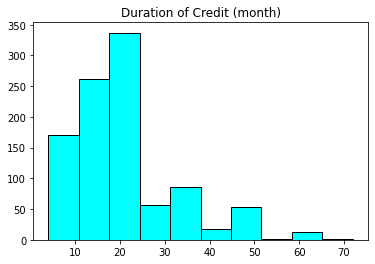

In [3]:
df.hist(column='Duration of Credit (month)', grid=False, color='cyan', ec='black')

Se puede ver con el histograma que no una discretizacion arbitraria eligiendo, por ejemplo, la cantidad de años, no seria ideal ya que habrian muchos datos de una categoria y pocos de otra.

In [15]:
pd.qcut(df['Duration of Credit (month)'], 4)

0       (12.0, 18.0]
1      (3.999, 12.0]
2      (3.999, 12.0]
3      (3.999, 12.0]
4      (3.999, 12.0]
           ...      
995     (18.0, 24.0]
996     (18.0, 24.0]
997     (18.0, 24.0]
998    (3.999, 12.0]
999     (24.0, 72.0]
Name: Duration of Credit (month), Length: 1000, dtype: category
Categories (4, interval[float64, right]): [(3.999, 12.0] < (12.0, 18.0] < (18.0, 24.0] < (24.0, 72.0]]

Optamos por las siguentes categorias:
- 1 = < 12 meses (corto plazo)
- 2 = 12 a 18 meses (corto-mediano plazo)
- 2 = 19 a 24 meses (mediano-largo plazo)
- 3 = >24 meses (largo plazo)

In [5]:
credit_time = df['Duration of Credit (month)']
cat1 = df[credit_time < 12]
cat2 = df[(credit_time >= 12) & (credit_time < 18)]
cat3 = df[(credit_time >= 18) & (credit_time < 25)]
cat4 = df[credit_time >= 25]
print(f"Cantidad de elementos por categoria")
print(f"Categoria 1: {len(cat1)}")
print(f"Categoria 2: {len(cat2)}")
print(f"Categoria 3: {len(cat3)}")
print(f"Categoria 4: {len(cat4)}")

Cantidad de elementos por categoria
Categoria 1: 180
Categoria 2: 253
Categoria 3: 337
Categoria 4: 230


### Credit Amount

array([[<AxesSubplot:title={'center':'Credit Amount'}>]], dtype=object)

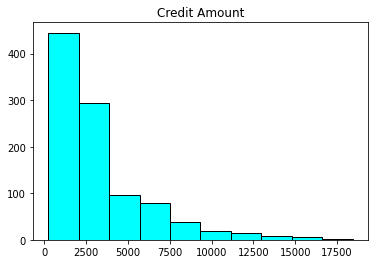

In [6]:
df.hist(column='Credit Amount', grid=False, color='cyan', ec='black')

In [7]:
pd.qcut(df['Credit Amount'], 5)

0      (249.999, 1262.0]
1       (1906.8, 2852.4]
2      (249.999, 1262.0]
3       (1906.8, 2852.4]
4       (1906.8, 2852.4]
             ...        
995     (1906.8, 2852.4]
996     (1906.8, 2852.4]
997    (4720.0, 18424.0]
998    (4720.0, 18424.0]
999    (4720.0, 18424.0]
Name: Credit Amount, Length: 1000, dtype: category
Categories (5, interval[float64, right]): [(249.999, 1262.0] < (1262.0, 1906.8] < (1906.8, 2852.4] < (2852.4, 4720.0] < (4720.0, 18424.0]]

In [8]:
credit_amount = df['Credit Amount']
cat1 = df[credit_amount < 1200]
cat2 = df[(credit_amount >= 1200) & (credit_amount < 2000)]
cat3 = df[(credit_amount >= 2000) & (credit_amount < 3000)]
cat4 = df[(credit_amount >= 3000) & (credit_amount < 5000)]
cat5 = df[credit_amount >= 5000]
print(f"Cantidad de elementos por categoria")
print(f"Categoria 1: {len(cat1)}")
print(f"Categoria 2: {len(cat2)}")
print(f"Categoria 3: {len(cat3)}")
print(f"Categoria 4: {len(cat4)}")
print(f"Categoria 5: {len(cat5)}")

Cantidad de elementos por categoria
Categoria 1: 164
Categoria 2: 268
Categoria 3: 188
Categoria 4: 192
Categoria 5: 188


### Age (years)

array([[<AxesSubplot:title={'center':'Age (years)'}>]], dtype=object)

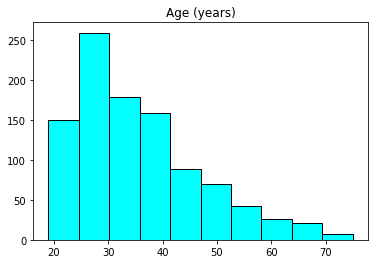

In [9]:
df.hist(column='Age (years)', grid=False, color='cyan', ec='black')

In [10]:
pd.qcut(df['Age (years)'], 4)

0      (18.999, 27.0]
1        (33.0, 42.0]
2      (18.999, 27.0]
3        (33.0, 42.0]
4        (33.0, 42.0]
            ...      
995    (18.999, 27.0]
996      (42.0, 75.0]
997      (27.0, 33.0]
998      (42.0, 75.0]
999      (27.0, 33.0]
Name: Age (years), Length: 1000, dtype: category
Categories (4, interval[float64, right]): [(18.999, 27.0] < (27.0, 33.0] < (33.0, 42.0] < (42.0, 75.0]]

In [11]:
age = df['Age (years)']
cat1 = df[age < 27]
cat2 = df[(age >= 27) & (age < 34)]
cat3 = df[(age >= 34) & (age < 44)]
cat4 = df[age >= 44]
print(f"Cantidad de elementos por categoria")
print(f"Categoria 1: {len(cat1)}")
print(f"Categoria 2: {len(cat2)}")
print(f"Categoria 3: {len(cat3)}")
print(f"Categoria 4: {len(cat4)}")

Cantidad de elementos por categoria
Categoria 1: 239
Categoria 2: 275
Categoria 3: 270
Categoria 4: 216
